# Part I - Dataset Analysis

1. Import the **training set ONLY** using Pandas (**HINT**: the dataset is in csv format). We have given you the `feature_names` already below.

2. Report the type of every feature (**HINT**: `DataFrame.dtype` might be handy).

3. Report if the dataset is balanced.

4. Print the feature values of every feature. In the case of a numerical feature print the range and average (with 3 decimal points) instead.

5. Using plots of histograms, bar-graphs or heatmaps *briefly* comment on the following (don't forget to include the plots in your .ipynb notebook):
    - Does the `age` feature follow a normal distribution (just by eyeballing)?
    - Is the `poutcome` feature unimodal (just by eyeballing)?
    - Is the `education` feature unimodal (just by eyeballing)?
    - Taking into account **only** the numerical features do you notice any correlation between pairs of features?

In [79]:
import pandas as pd
import numpy as np

feature_names = ["age","job","marital","education","default","balance","housing",
                              "loan","contact","day","month","duration","campaign","pdays","previous","poutcome", "category"]

# TODO: Fill-in (Answer questions 2-4)
banktrain=pd.read_csv("bank_train",header=None)
banktrain.columns=feature_names
#Question 2
feature=list(feature_names)
feature.remove("category")
feature_type={"feature_names":feature,"type":['numerical','categorical','categorical','categorical','categorical','numerical','categorical','categorical','categorical','categorical','categorical','numerical','numerical','numerical','numerical','categorical']}
feature_type=pd.DataFrame(feature_type)
print("QUESTION 2 \n",feature_type)
#Question 3
print("QUESTION 3 \n",banktrain['category'].value_counts()/banktrain['category'].count()) #to find the proportion of yes and no
#Question 4
pd.set_option('display.max_colwidth', None ) #to display the whole column of feature values
Name=[]
Category=[]
for index, row in feature_type.iterrows():  # for categorical print each feature value, for numerical print minimum, maximum and average
    if row['type']== "categorical":
        Name.append(row['feature_names'])
        Category.append(banktrain[row['feature_names']].unique())
    if row['type'] == 'numerical':
        Name.append(row['feature_names'])
        Category.append((min(banktrain[row['feature_names']]),max(banktrain[row['feature_names']]),round(sum(banktrain[row['feature_names']])/len(banktrain[row['feature_names']]),3)))

feature_values=pd.DataFrame({'Feature Name': Name, 'Feature Values': Category}) 
print("QUESTION 4 \n",feature_values)

QUESTION 2 
    feature_names         type
0            age    numerical
1            job  categorical
2        marital  categorical
3      education  categorical
4        default  categorical
5        balance    numerical
6        housing  categorical
7           loan  categorical
8        contact  categorical
9            day  categorical
10         month  categorical
11      duration    numerical
12      campaign    numerical
13         pdays    numerical
14      previous    numerical
15      poutcome  categorical
QUESTION 3 
 no     0.550013
yes    0.449987
Name: category, dtype: float64
QUESTION 4 
    Feature Name  \
0           age   
1           job   
2       marital   
3     education   
4       default   
5       balance   
6       housing   
7          loan   
8       contact   
9           day   
10        month   
11     duration   
12     campaign   
13        pdays   
14     previous   
15     poutcome   

                                                                

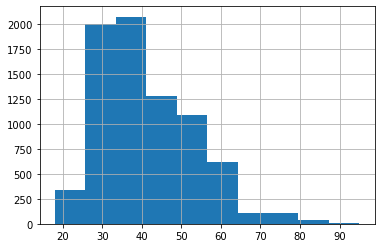

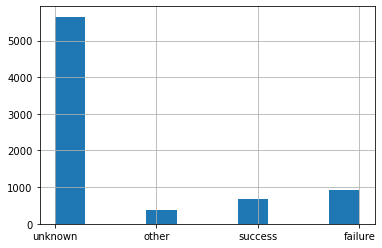

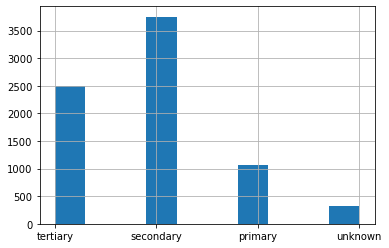

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

#TODO Fill-in (Answer question 5)
banktrain['age'].hist() #plot the histogram
plt.show()
banktrain['poutcome'].hist() #plot the histogram
plt.show()
banktrain['education'].hist() #plot the histogram
plt.show()

In [6]:
numerical=banktrain[feature_type[feature_type['type']=="numerical"]['feature_names']].copy() #to get only numerical features in the dataset
corr= numerical.corr() #find the correlation between the nuemerical features
corr.style.background_gradient(cmap='coolwarm') #plot the heatmap of the correlation

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.102059,-0.003835,-0.012676,-0.005871,0.012205
balance,0.102059,1.000000,0.021275,-0.030637,0.016969,0.027258
duration,-0.003835,0.021275,1.000000,-0.034308,-0.026102,-0.019440
campaign,-0.012676,-0.030637,-0.034308,1.000000,-0.102208,-0.051791
pdays,-0.005871,0.016969,-0.026102,-0.102208,1.000000,0.506422
previous,0.012205,0.027258,-0.019440,-0.051791,0.506422,1.000000


## Part II (Decision Trees)

- Load data without any preprocessing
- Perform hyperparameter tuning on depth of DT
- Plot train, dev accuracy curves
- Test on test set ONCE

In [36]:
# Dataset loading
from BankDataset import load_dataset

train_dataset = load_dataset('bank_train', preprocess_onehot=True) #load the data set
dev_dataset = load_dataset('bank_dev', preprocess_onehot=True)
test_dataset = load_dataset('bank_test', preprocess_onehot=True)

Loading bank dataset from file bank_train
Dataset correctly loaded
Number of features is 16
Number of instances is 7638
one-hot selected
Loading bank dataset from file bank_dev
Dataset correctly loaded
Number of features is 16
Number of instances is 1176
one-hot selected
Loading bank dataset from file bank_test
Dataset correctly loaded
Number of features is 16
Number of instances is 2938
one-hot selected


In [ ]:
t= []
d=[]

for i in range(x,x)
    clf=tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(train_dataset.X,train_dataset.y)
    #clf.score(train_dataset.X,train_dataset.y)
    #clf.score(dev_dataset.X,dev_dataset.y)
    t.append(clf.score(train_dataset.X,train_dataset.y))
    d.append(clf.score(dev_dataset.X,dev_dataset.y))
plt.plot(range(x,x),t)
plt.plot(range(x,x),d)
plt.show()

from sklearn import metrics
clf=tree.DecisionTreeClassifier(max_depth=)
clf.fit(train_dataset.X,train_dataset.y)
y_predict=clf.predict(test_dataset.X)
metrics.accuracy_score(test_dataset.y,y_predict) #test accuracy

In [ ]:
ASD={"asd":range(10)}
print(ASD)

    Depth  Train Accuracy  Dev Accuracy
0   5      0.804923        0.788265    
1   6      0.829013        0.804422    
2   7      0.850223        0.824830    
3   8      0.864101        0.818878    
4   9      0.877193        0.818878    
5   10     0.890416        0.816327    
6   11     0.904556        0.823980    
7   12     0.914768        0.829932    
8   13     0.925504        0.820578    
9   14     0.938073        0.826531    
10  15     0.947499        0.821429    
11  16     0.956140        0.824830    
12  17     0.961508        0.823980    
13  18     0.969626        0.816327    
14  19     0.976695        0.824830    


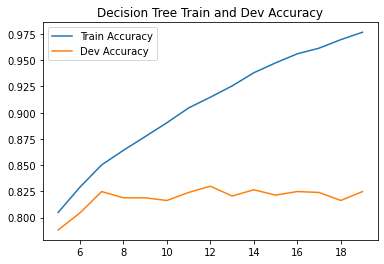

Chosen Depth : 12 Test Accuracy :  0.8243703199455412


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Fill-in (Hyperparameter Tuning)
train_accuracy=[] #create a empty list
dev_accuracy=[] #create a empty list
depth=range(5,20)
for i in depth: #run the decisiontreeclassifier with max_depth from 5 to 19
    model=tree.DecisionTreeClassifier(max_depth=i) #create decision tree model
    model.fit(train_dataset.X,train_dataset.y) #fit the data into the model
    train_accuracy.append(model.score(train_dataset.X, train_dataset.y))
    dev_accuracy.append(model.score(dev_dataset.X, dev_dataset.y))

Data_DT=pd.DataFrame({"Depth": depth, "Train Accuracy" : train_accuracy, "Dev Accuracy" : dev_accuracy})
print(Data_DT)

plt.plot(depth,train_accuracy,label='Train Accuracy') #plot train accuracy and dev accuracy curves
plt.plot(depth,dev_accuracy,label='Dev Accuracy')
plt.title("Decision Tree Train and Dev Accuracy") #add title
plt.legend()
plt.show()

# TODO: Fill-in (Test on test set)  
from sklearn import metrics
model_1=tree.DecisionTreeClassifier(max_depth=12)
model_1.fit(train_dataset.X,train_dataset.y)
y_predict=model_1.predict(test_dataset.X) #predict the test set
test_score=metrics.accuracy_score(test_dataset.y,y_predict)
print("Chosen Depth : 12","Test Accuracy : ",test_score)

## Part III (k Nearest Neighbours)

- Load data with 1-hot encoding and scaling
- Perform hyperparameter tuning on number of neighbours k
- Plot train, dev accuracy curves
- Test on test set ONCE...more!

In [10]:
# Dataset loading (load data again! Careful with preprocessing parameters)
from BankDataset import load_dataset

# TODO: Fill-in
knn_train_dataset = load_dataset('bank_train', preprocess_onehot=True,apply_scaling=True) #load dataset with 1-hot encoding and scaling
knn_dev_dataset = load_dataset('bank_dev', preprocess_onehot=True,apply_scaling=True)
knn_test_dataset = load_dataset('bank_test', preprocess_onehot=True,apply_scaling=True)

Loading bank dataset from file bank_train
Dataset correctly loaded
Number of features is 16
Number of instances is 7638
one-hot selected
Loading bank dataset from file bank_dev
Dataset correctly loaded
Number of features is 16
Number of instances is 1176
one-hot selected
Loading bank dataset from file bank_test
Dataset correctly loaded
Number of features is 16
Number of instances is 2938
one-hot selected


     K  Train Accuracy  Dev Accuracy
0   3   0.868290        0.753401    
1   4   0.816706        0.738095    
2   5   0.838308        0.762755    
3   6   0.810029        0.756803    
4   7   0.826918        0.772109    
5   8   0.806494        0.769558    
6   9   0.820372        0.789116    
7   10  0.800864        0.783163    
8   11  0.811338        0.784014    
9   12  0.800209        0.779762    
10  13  0.807803        0.784864    
11  14  0.793401        0.780612    
12  15  0.801519        0.794218    
13  16  0.787903        0.800170    
14  17  0.794973        0.796769    
15  18  0.783713        0.789966    
16  19  0.790652        0.791667    
17  20  0.784106        0.795068    
18  21  0.790128        0.796769    


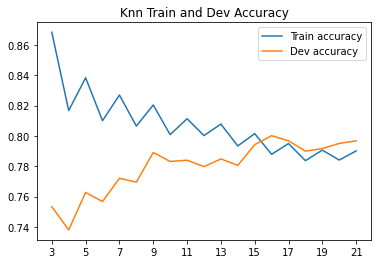

Chosen K : 15   Test Score :  0.7726344452008169


In [63]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Fill-in (Hyperparameter Tuning)
k=range(3,22)
knn_train_accuracy=[] #create a empty list
knn_dev_accuracy=[] #create a empty list
for i in k: #run K-Nearest Neighbors classifier with k from 3 to 21
    model=KNeighborsClassifier(n_neighbors=i) # create K-Nearest Neighbors classifier
    model.fit(knn_train_dataset.X,knn_train_dataset.y) # fit the dataset into the model
    knn_train_accuracy.append(model.score(knn_train_dataset.X,knn_train_dataset.y))
    knn_dev_accuracy.append(model.score(knn_dev_dataset.X,knn_dev_dataset.y))

Data=pd.DataFrame({"K": k, "Train Accuracy" : knn_train_accuracy, "Dev Accuracy" : knn_dev_accuracy})
print(Data)

plt.plot(n,knn_train_accuracy,label="Train accuracy") #plot the Knn model's train and dev accuracy
plt.plot(n,knn_dev_accuracy,label="Dev accuracy")
plt.title("Knn Train and Dev Accuracy") #add title
plt.xticks(np.arange(3,22,2)) #adjust the scale
plt.legend()
plt.show()



#TODO: Fill-in (Test on test set)
model_knn=KNeighborsClassifier(n_neighbors=15)
model_knn.fit(knn_train_dataset.X,knn_train_dataset.y)
knn_y_predict=model_knn.predict(knn_test_dataset.X) #predict the test set
knn_score=metrics.accuracy_score(knn_test_dataset.y,knn_y_predict)
print("Chosen K : 15 " ," Test Score : ", knn_score)
